# Statistics Worsheet:

###### 1. You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. You are required to do the following:

Before doing any analysis it would be a good idea to check for any hypens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data. Prepare a short report to answer the following questions:
* 1.	Which are the teams which started playing between 1930-1980?
* 2.	Which are the top 5 teams in terms of points?
* 3.	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)
* 4.	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.




###### Importing the DataSet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
laliga=pd.read_csv("Laliga.csv",skiprows=[0])
laliga.head()


,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [4]:
laliga.replace("-",np.nan,inplace=True)
laliga

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,Xerez,1,34,38,8,10,20,38,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-10,2009-10,20
57,58,Condal,1,22,30,7,8,15,37,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956-57,1956-57,16
58,59,Atletico Tetuan,1,19,30,7,5,18,51,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1951-52,1951-52,16
59,60,Cultural Leonesa,1,14,30,5,4,21,34,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955-56,1955-56,15


In [5]:
laliga.drop(60,inplace=True)
laliga.Champion.fillna(value=0,inplace=True)

In [6]:
laliga["Runner-up"].fillna(value=0,inplace=True)
laliga["Third"].fillna(value=0,inplace=True)
laliga["Fourth"].fillna(value=0,inplace=True)

laliga["Sixth"].fillna(value=0,inplace=True)
laliga["Fifth"].fillna(value=0,inplace=True)


In [7]:
laliga.isnull().sum()

Pos               0
Team              0
Seasons           0
Points            0
GamesPlayed       0
GamesWon          0
GamesDrawn        0
GamesLost         0
GoalsFor          0
GoalsAgainst      0
Champion          0
Runner-up         0
Third             0
Fourth            0
Fifth             0
Sixth             0
T                27
Debut             0
Since/LastApp     0
BestPosition      0
dtype: int64

In [8]:
#WE can see that the t table is not usefull for us and hence i decide to drop the same
laliga.drop(labels="T",axis=1,inplace=True)

In [9]:
def change_date(x):
    if "-" in  x:
        return int(x[:4])
    else:
        return int(x)

In [10]:
laliga.Debut=laliga.Debut.apply(change_date)
laliga["Since/LastApp"]=laliga["Since/LastApp"].apply(change_date)

   #### Univariate Analysis
   

In [11]:
laliga.columns

Index(['Pos', 'Team', 'Seasons', 'Points', 'GamesPlayed', 'GamesWon',
       'GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst', 'Champion',
       'Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth', 'Debut',
       'Since/LastApp', 'BestPosition'],
      dtype='object')

C:\Users\Nikhil Shinde\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nikhil Shinde\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nikhil Shinde\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

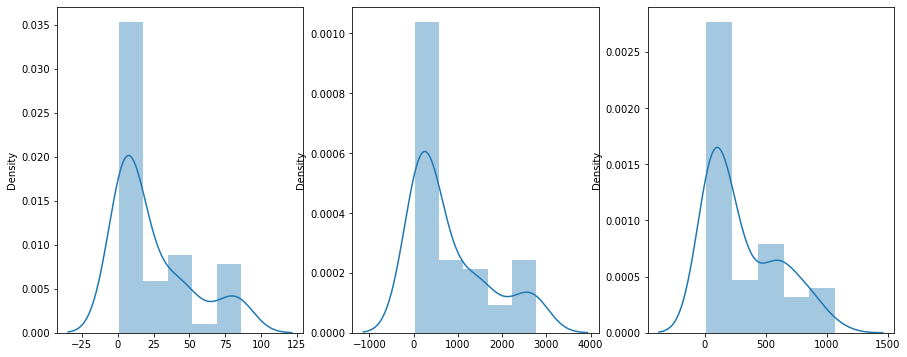

In [12]:
figure,axes=plt.subplots(1,3,figsize=(15,6))
sns.distplot(x=laliga["Seasons"],ax=axes[0])

sns.distplot(x=laliga["GamesPlayed"],ax=axes[1])

sns.distplot(x=laliga["GamesLost"],ax=axes[2])
plt.show()

In [13]:
laliga[["GamesPlayed","GamesWon","GamesDrawn","GamesLost","GoalsFor"]].astype("int64")

,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor
0,2762,1647,552,563,5947
1,2762,1581,573,608,5900
2,2614,1241,598,775,4534
3,2664,1187,616,861,4398
4,2762,1209,633,920,4631
5,2408,990,531,887,3680
6,2626,948,608,1070,3609
7,2302,864,577,861,3228
8,1986,698,522,766,2683
9,1728,606,440,682,2159


In [14]:
#Which are the teams which started playing between 1930-1980
laliga[laliga["Debut"].between(1930,1980)]

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,Debut,Since/LastApp,BestPosition
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,1931,1987,1
5,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,1934,2001,1
8,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,0,1,4,5,4,4,1939,2012,2
9,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,0,2,3,4,4,1932,2015,1
10,11,Deportivo La Coruna,45,1814,1530,563,392,575,2052,2188,1,5,4,1,0,1,1941,2014,1
11,12,Celta Vigo,51,1789,1698,586,389,723,2278,2624,0,0,0,2,4,5,1939,2012,4
12,13,Valladolid,42,1471,1466,463,384,619,1767,2180,0,0,0,1,1,1,1948,2013,4
14,15,Sporting Gijon,43,1389,1458,471,358,629,1753,2152,0,1,1,2,2,1,1944,2015,2
15,16,Osasuna,37,1351,1318,426,327,565,1500,1834,0,0,0,2,2,2,1935,2016,4
16,17,Malaga,36,1314,1255,390,330,535,1421,1763,0,0,0,1,0,1,1949,2008,4


In [15]:
#2Which are the top 5 teams in terms of points?
laliga.Points.astype("int64")
laliga.groupby(by="Team",sort=False)["Points"].max().head(5)


Team
Real Madrid        4385
Barcelona          4262
Atletico Madrid    3442
Valencia           3386
Athletic Bilbao    3368
Name: Points, dtype: object

In [16]:
laliga["gamesplayed"]=laliga.GamesPlayed.astype("int64")
laliga["gamewon"]=laliga.GamesWon.astype("int64")
laliga.drop(labels=["GamesPlayed","GamesWon"],inplace=True,axis=1)

In [17]:
#3What is the distribution of the winning percentage for all teams?
#Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

laliga["Percent_winning"]=(laliga["gamewon"]/laliga["gamesplayed"])*100
laliga[["Team","Percent_winning"]].head(5)

,Team,Percent_winning
0,Real Madrid,59.630702
1,Barcelona,57.241130
2,Atletico Madrid,47.475134
3,Valencia,44.557057
4,Athletic Bilbao,43.772629


In [18]:
#Is there a significant difference in the winning percentage for teams which have attained a best position between
#1-3 and those teams which have had a best position between 4-7.

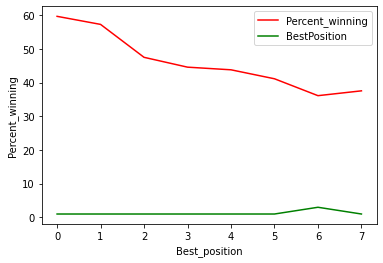

In [19]:
laliga[["Percent_winning","BestPosition","Team"]].head(8).plot(kind="line",xlabel="Best_position",ylabel="Percent_winning",color=["r","g"])
plt.legend()
plt.show()
#We can see a the Percent_winning and BestPosition are negatively correlated as the percentage of the winning increases the the Best position of the team also increases 
#and decrease increase in BestPositiion the winning percentage increases


In [20]:
laliga[["BestPosition","Percent_winning"]].corr()
# as the line graph show the best_position and winning percentage are negative highly correlated

,BestPosition,Percent_winning
BestPosition,1.000000,-0.737288
Percent_winning,-0.737288,1.000000


##### lets do it statistically
* Ho: There is no significant difference in the winning percentage of the teams
* H1: There is significant difference in the winning percentage of the teams


In [21]:
pct1=laliga[["Percent_winning"]].head(3)
pct2=laliga[["Percent_winning"]].iloc[3:7]

In [24]:
alpha=0.05
teststats,pvalue=stats.ttest_ind(pct1,pct2)
print("The Test Statistics is ",teststats)
print("The Pvalue is",pvalue)
 
if (pvalue>alpha):
    print("Fail to reject the Ho")
else:
    print("Reject the Ho as there is significant difference in the winning percentage of the teams")

The Test Statistics is  [3.48428522]
The Pvalue is [0.01757778]
Reject the Ho as there is significant difference in the winning percentage of the teams



##### 2. A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.

* a)	Calculate the estimated standard error of the sample mean? What does the standard error indicate?
* b)	Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.
* c)	Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?
* d)	Which of the two above intervals are wider?
* e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.



In [26]:
n=200
mu=140
std_dev=25
se=std_dev/np.sqrt(n)
xbar=mu


##### a) Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [27]:
print("The standard error and sample mean of the given sample is {} and {} respectively".format(se,mu))


The standard error and sample mean of the given sample is 1.7677669529663687 and 140 respectively


##### b) Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

In [28]:
print(stats.t.interval(0.95,199,xbar,se))


(136.51404038839016, 143.48595961160984)


##### c) Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [29]:
n2 = 100
x_bar = 140
std = 25
se2 = std/np.sqrt(n2)
se2

2.5

###### d) Which of the two above intervals are wider?

When the Sample size decreases, the confidence interval increases. As the sample size increases, the sample mean tends to get closer to the population mean. As we see above. while sample size was 200 the interval was of 7 numbers. as sample size decreased to 100, the interval became wider to 9.

###### e) Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

As we increase the sample size, the accuracy of the data increases and error decreases. As we collect large number of data, we have more information to get the insights from. Therefore we can get more accurate insights as our data increases. As a result standard error decreases.

###### 3. Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.
###### One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.

* 1.	Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.
* 2.	Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?
* 3.	What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

#### 1.	Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.



Solution:-
* H0: There is no difference in the mean driving distance between current and new golf balls.
* H1: There is a difference in the mean driving distance between current and new golf balls.

In [31]:
df2 = pd.read_csv('Golf.csv')
df2.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [32]:
alpha = 0.05
teststats, pvalue = stats.ttest_ind(df2['Current'],df2['New'])  
print("The Test Statistic is", teststats)
print("The PValue is ", pvalue)

if(pvalue > alpha):
    print("Fail to Reject Ho meaning that There is no difference in the mean driving distance between current and new golf balls.")
else:
    print("Reject Ho meaning that  difference in the mean driving distance between current and new golf balls.")
    

The Test Statistic is 1.3283615935245678
The PValue is  0.18793228491854663
Fail to Reject Ho meaning that There is no difference in the mean driving distance between current and new golf balls.


#### 3.	What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

* 95% Confidence interval for population mean of New Model

In [33]:
n = 40
xbar = df2['Current'].mean()
std = df2['Current'].std()
se = std/np.sqrt(n)

stats.t.interval(0.95,n-1, xbar, se)

(267.47565965314044, 273.0743403468595)

In [34]:
n=40
xbar = df2['New'].mean()
std = df2['New'].std()
se = std/np.sqrt(n)

stats.t.interval(0.95,n-1, xbar, se)

(264.33481641038986, 270.66518358961014)

#### 95% Confidence interval for the difference between the means of the two population

In [35]:
df2['Diff'] = df2['Current'] - df2['New']

In [36]:
df2['Diff'].mean()

2.775

In [37]:
n=40
xbar = df2['Diff'].mean()
std = df2['Diff'].std(ddof=1)
se = std/np.sqrt(n)

stats.t.interval(0.95,n-1, xbar, se)

(-1.620535804056375, 7.1705358040563745)